In [1]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [2]:
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.9/78.2 GB disk)


In [3]:
from ultralytics import YOLO

from IPython.display import display, Image

In [5]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="EVLoCzmvGSW10Blbwpn5")
project = rf.workspace("collage-j4dw0").project("oil_spill-6gaxj")
dataset = project.version(1).download("yolov8")


/content/datasets
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.134`



Extracting Dataset Version Zip to Oil_Spill-1 in yolov8:: 100%|██████████| 1148/1148 [00:00<00:00, 7930.28it/s]


In [6]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 130MB/s] 

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/Oil_Spill-1/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=Fals

In [7]:
!ls {HOME}/runs/detect/train/

args.yaml					    R_curve.png       train_batch510.jpg
confusion_matrix.png				    results.csv       train_batch511.jpg
events.out.tfevents.1697602040.be943b5babe2.1371.0  results.png       train_batch512.jpg
F1_curve.png					    train_batch0.jpg  val_batch0_labels.jpg
P_curve.png					    train_batch1.jpg  val_batch0_pred.jpg
PR_curve.png					    train_batch2.jpg  weights


/content


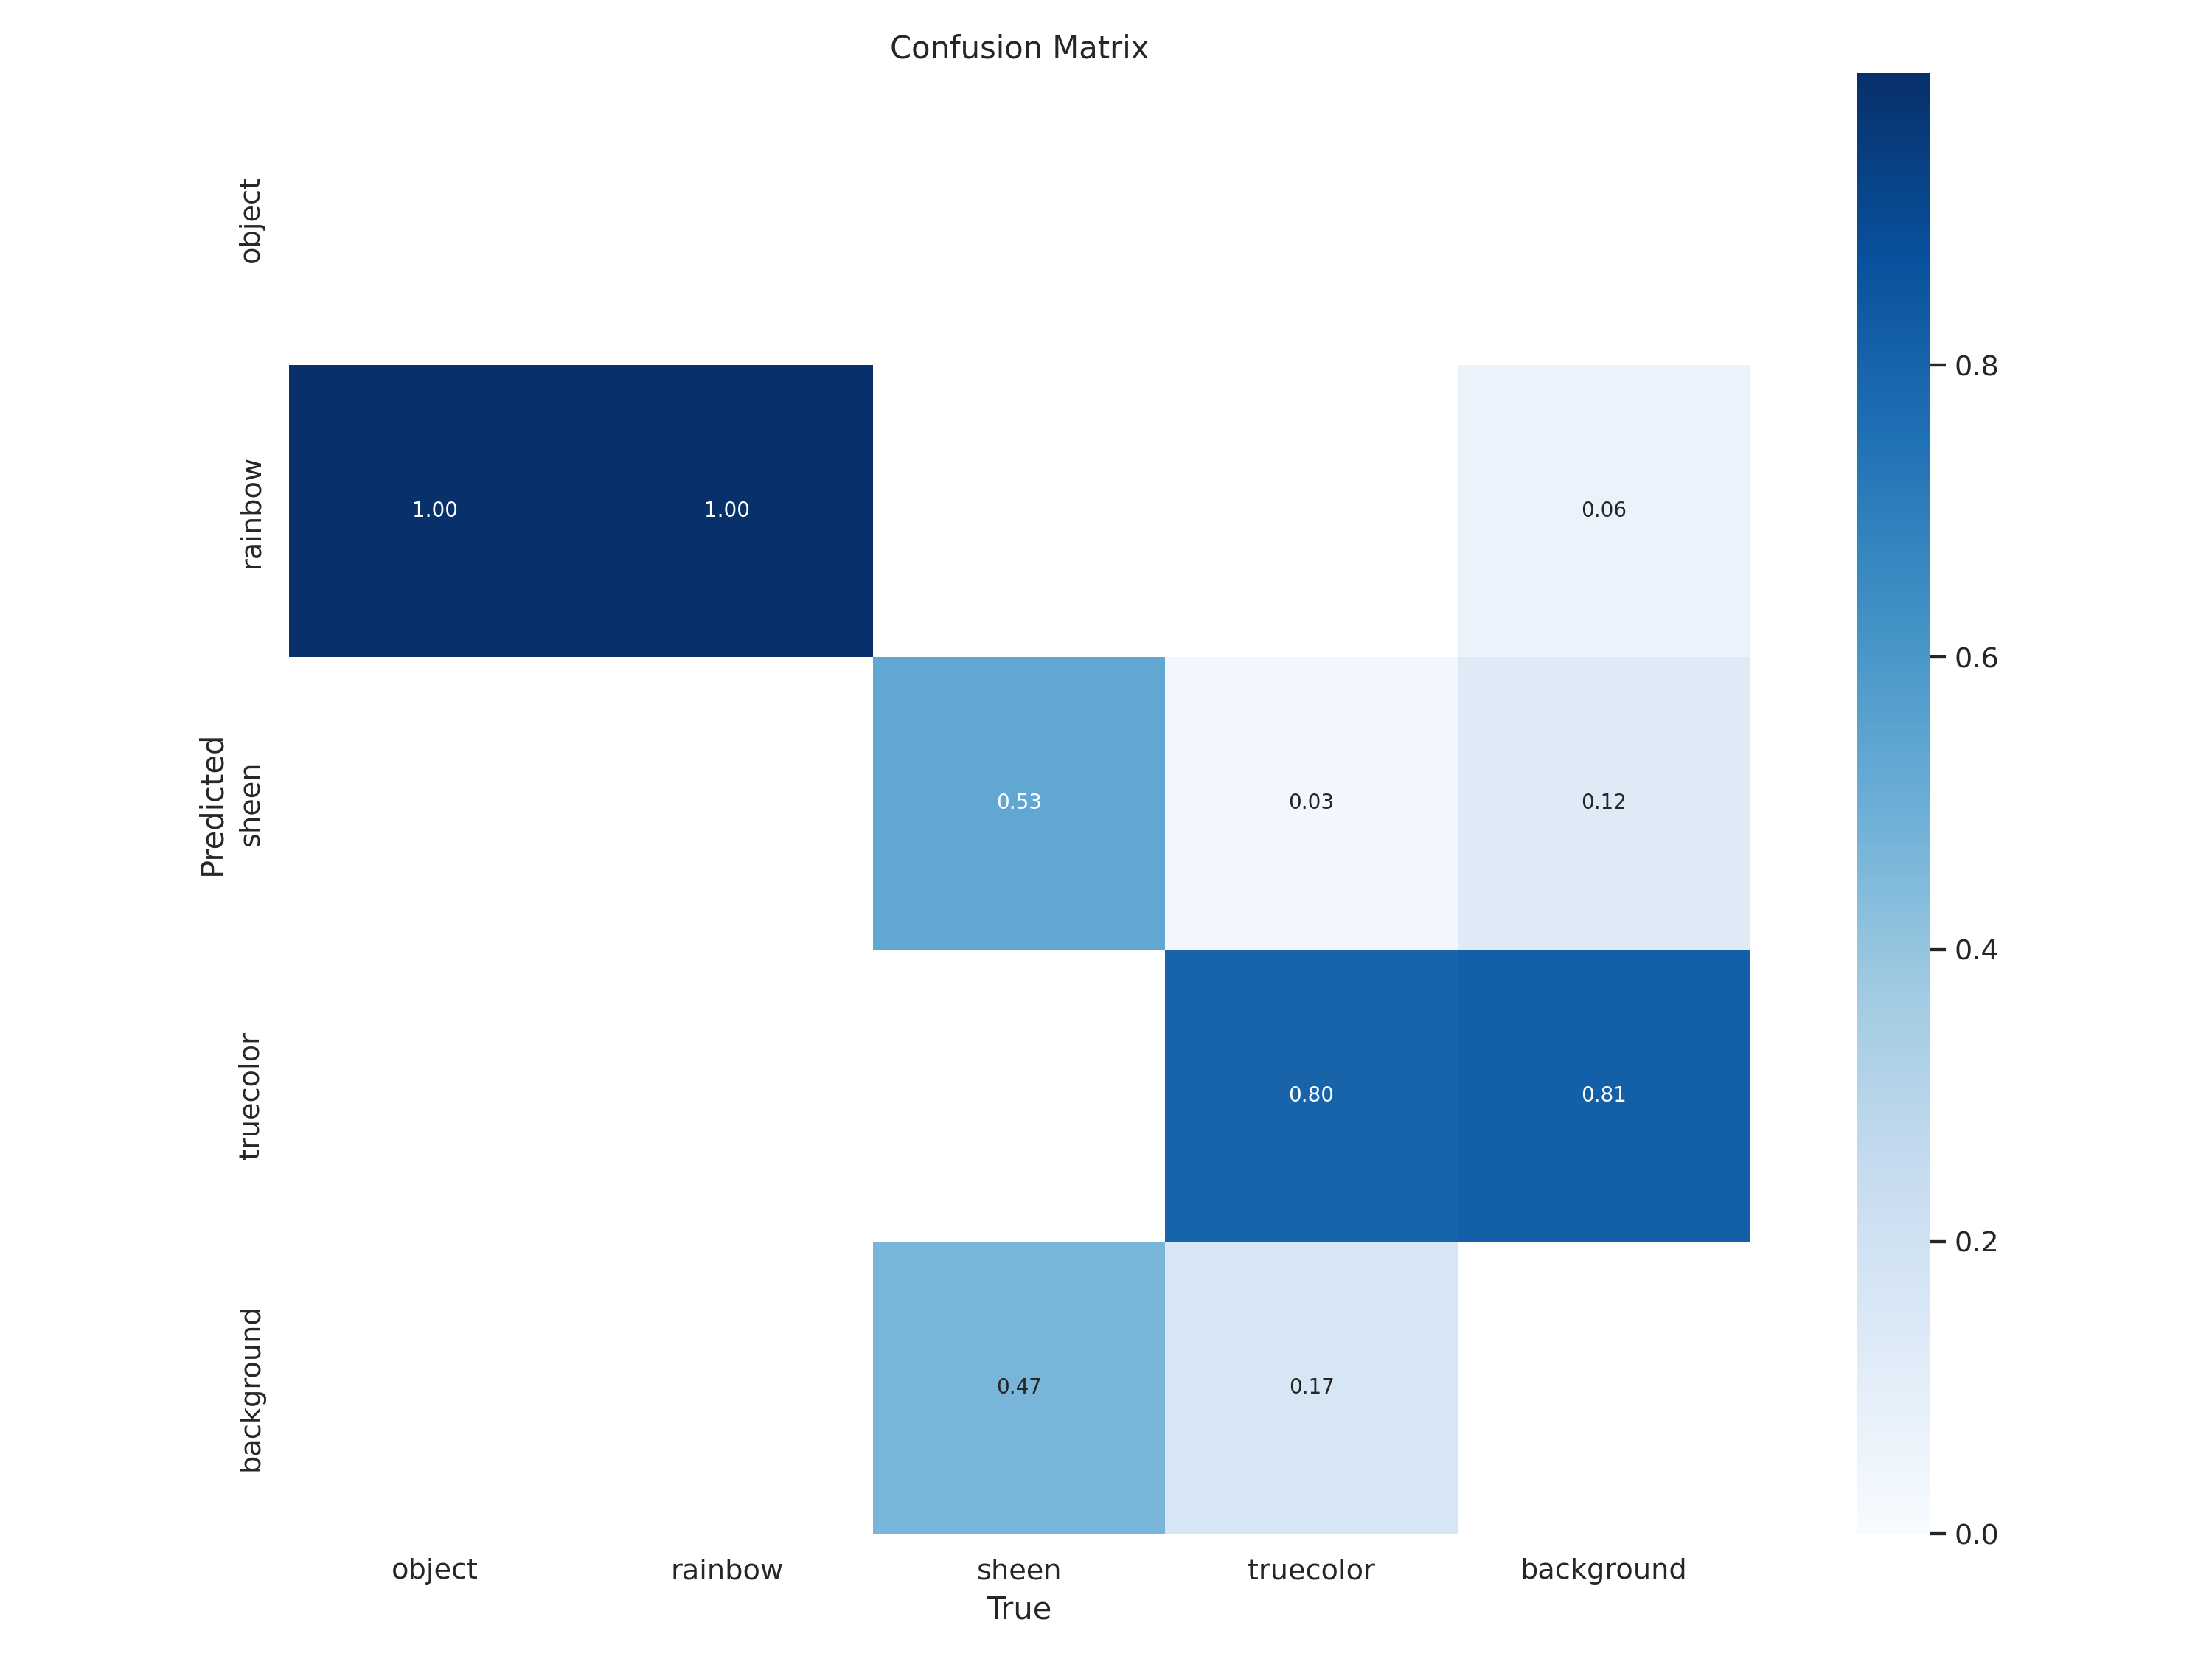

In [8]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


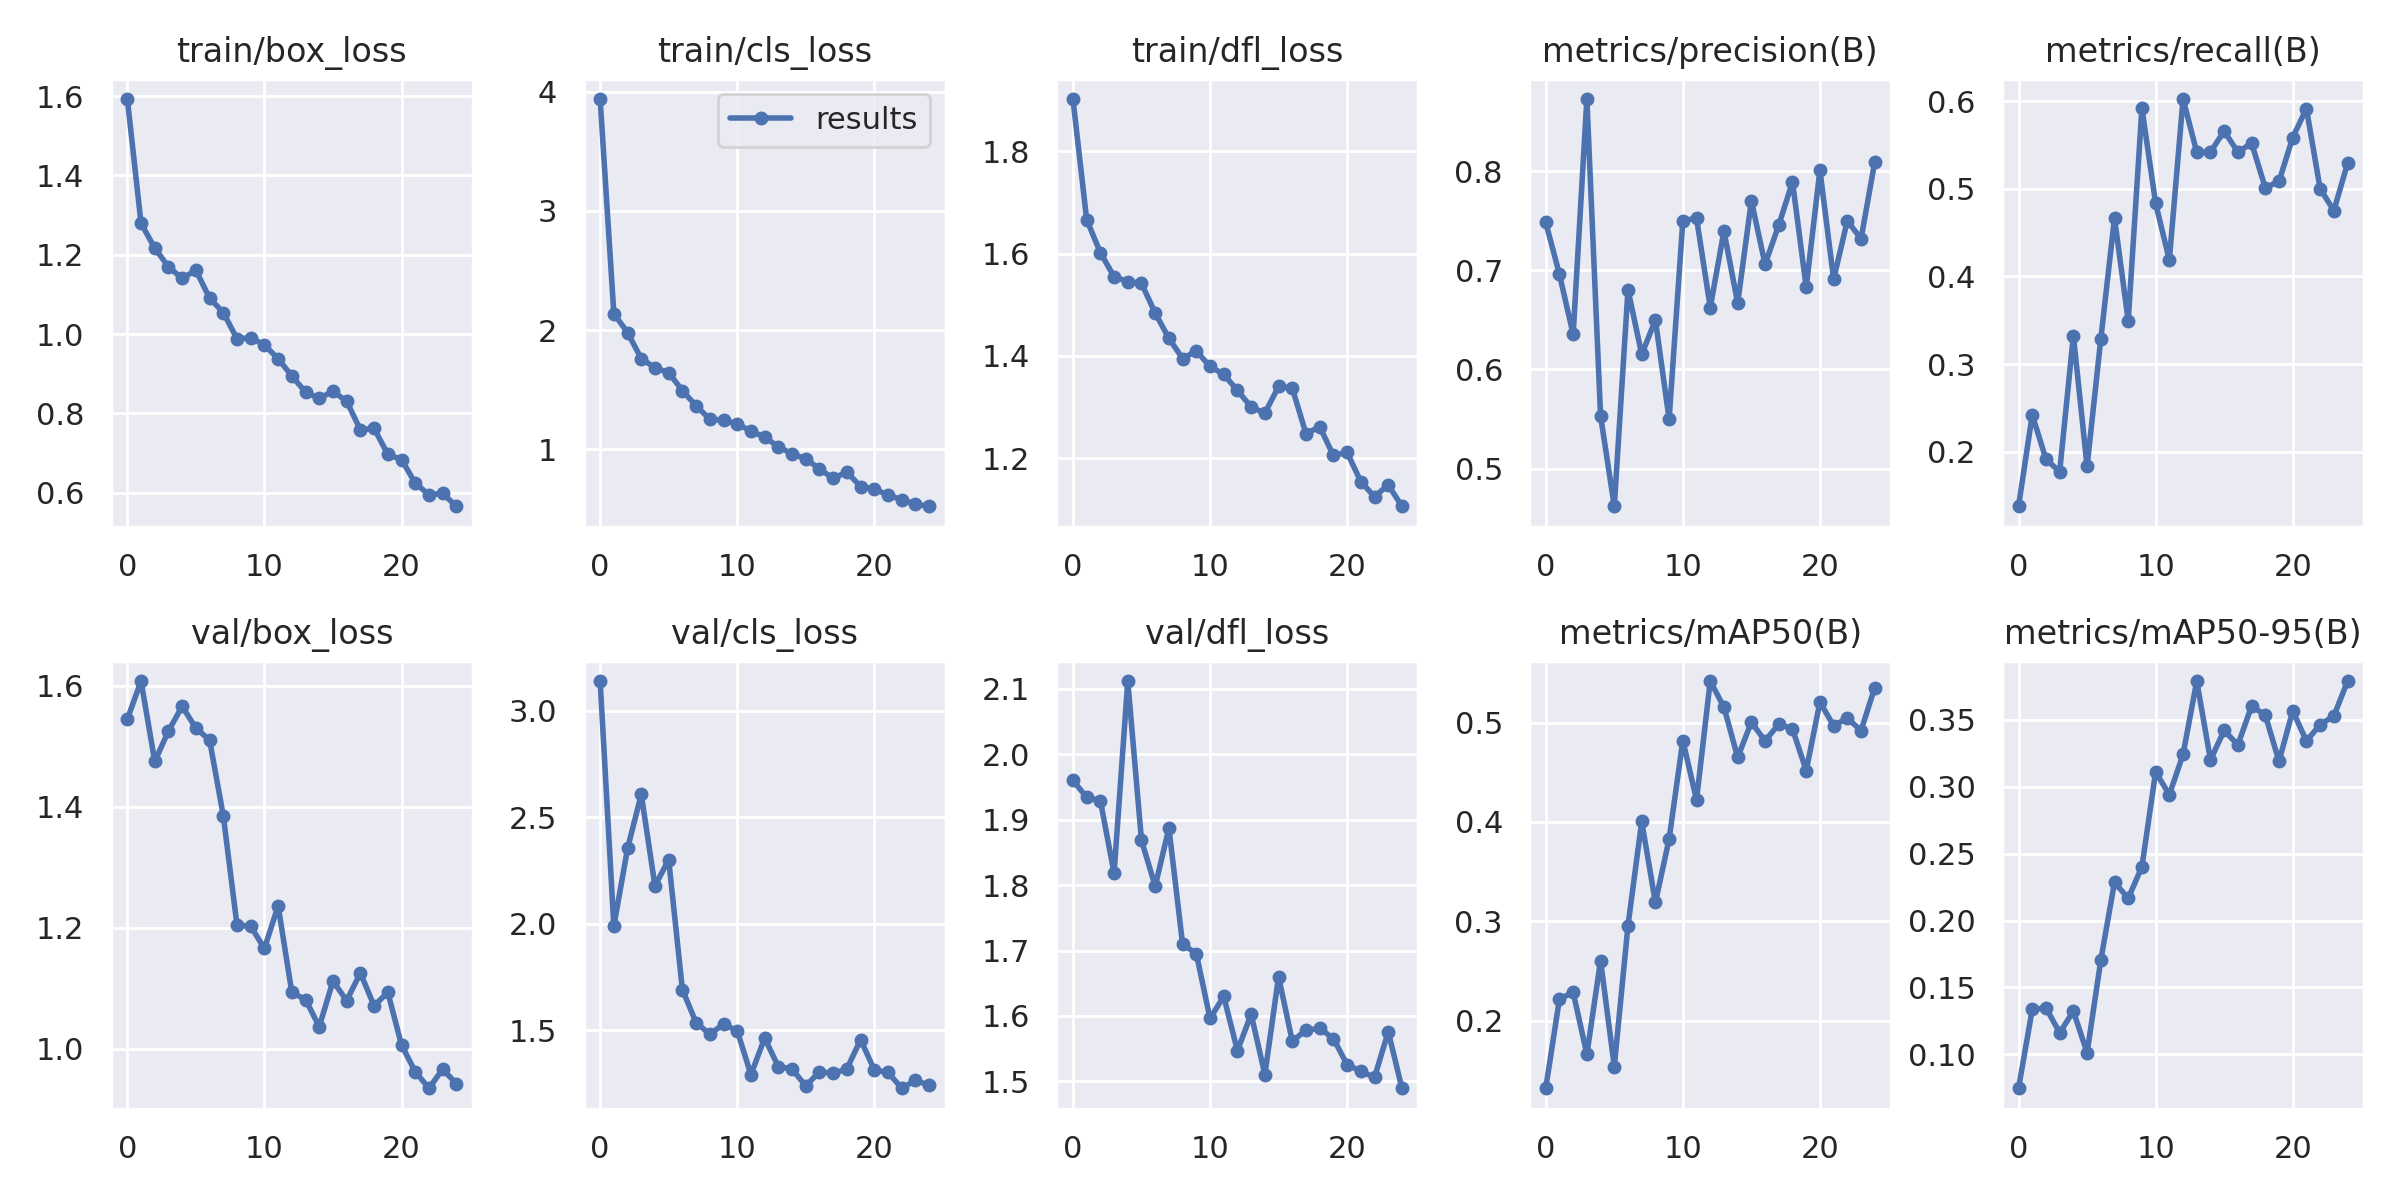

In [9]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


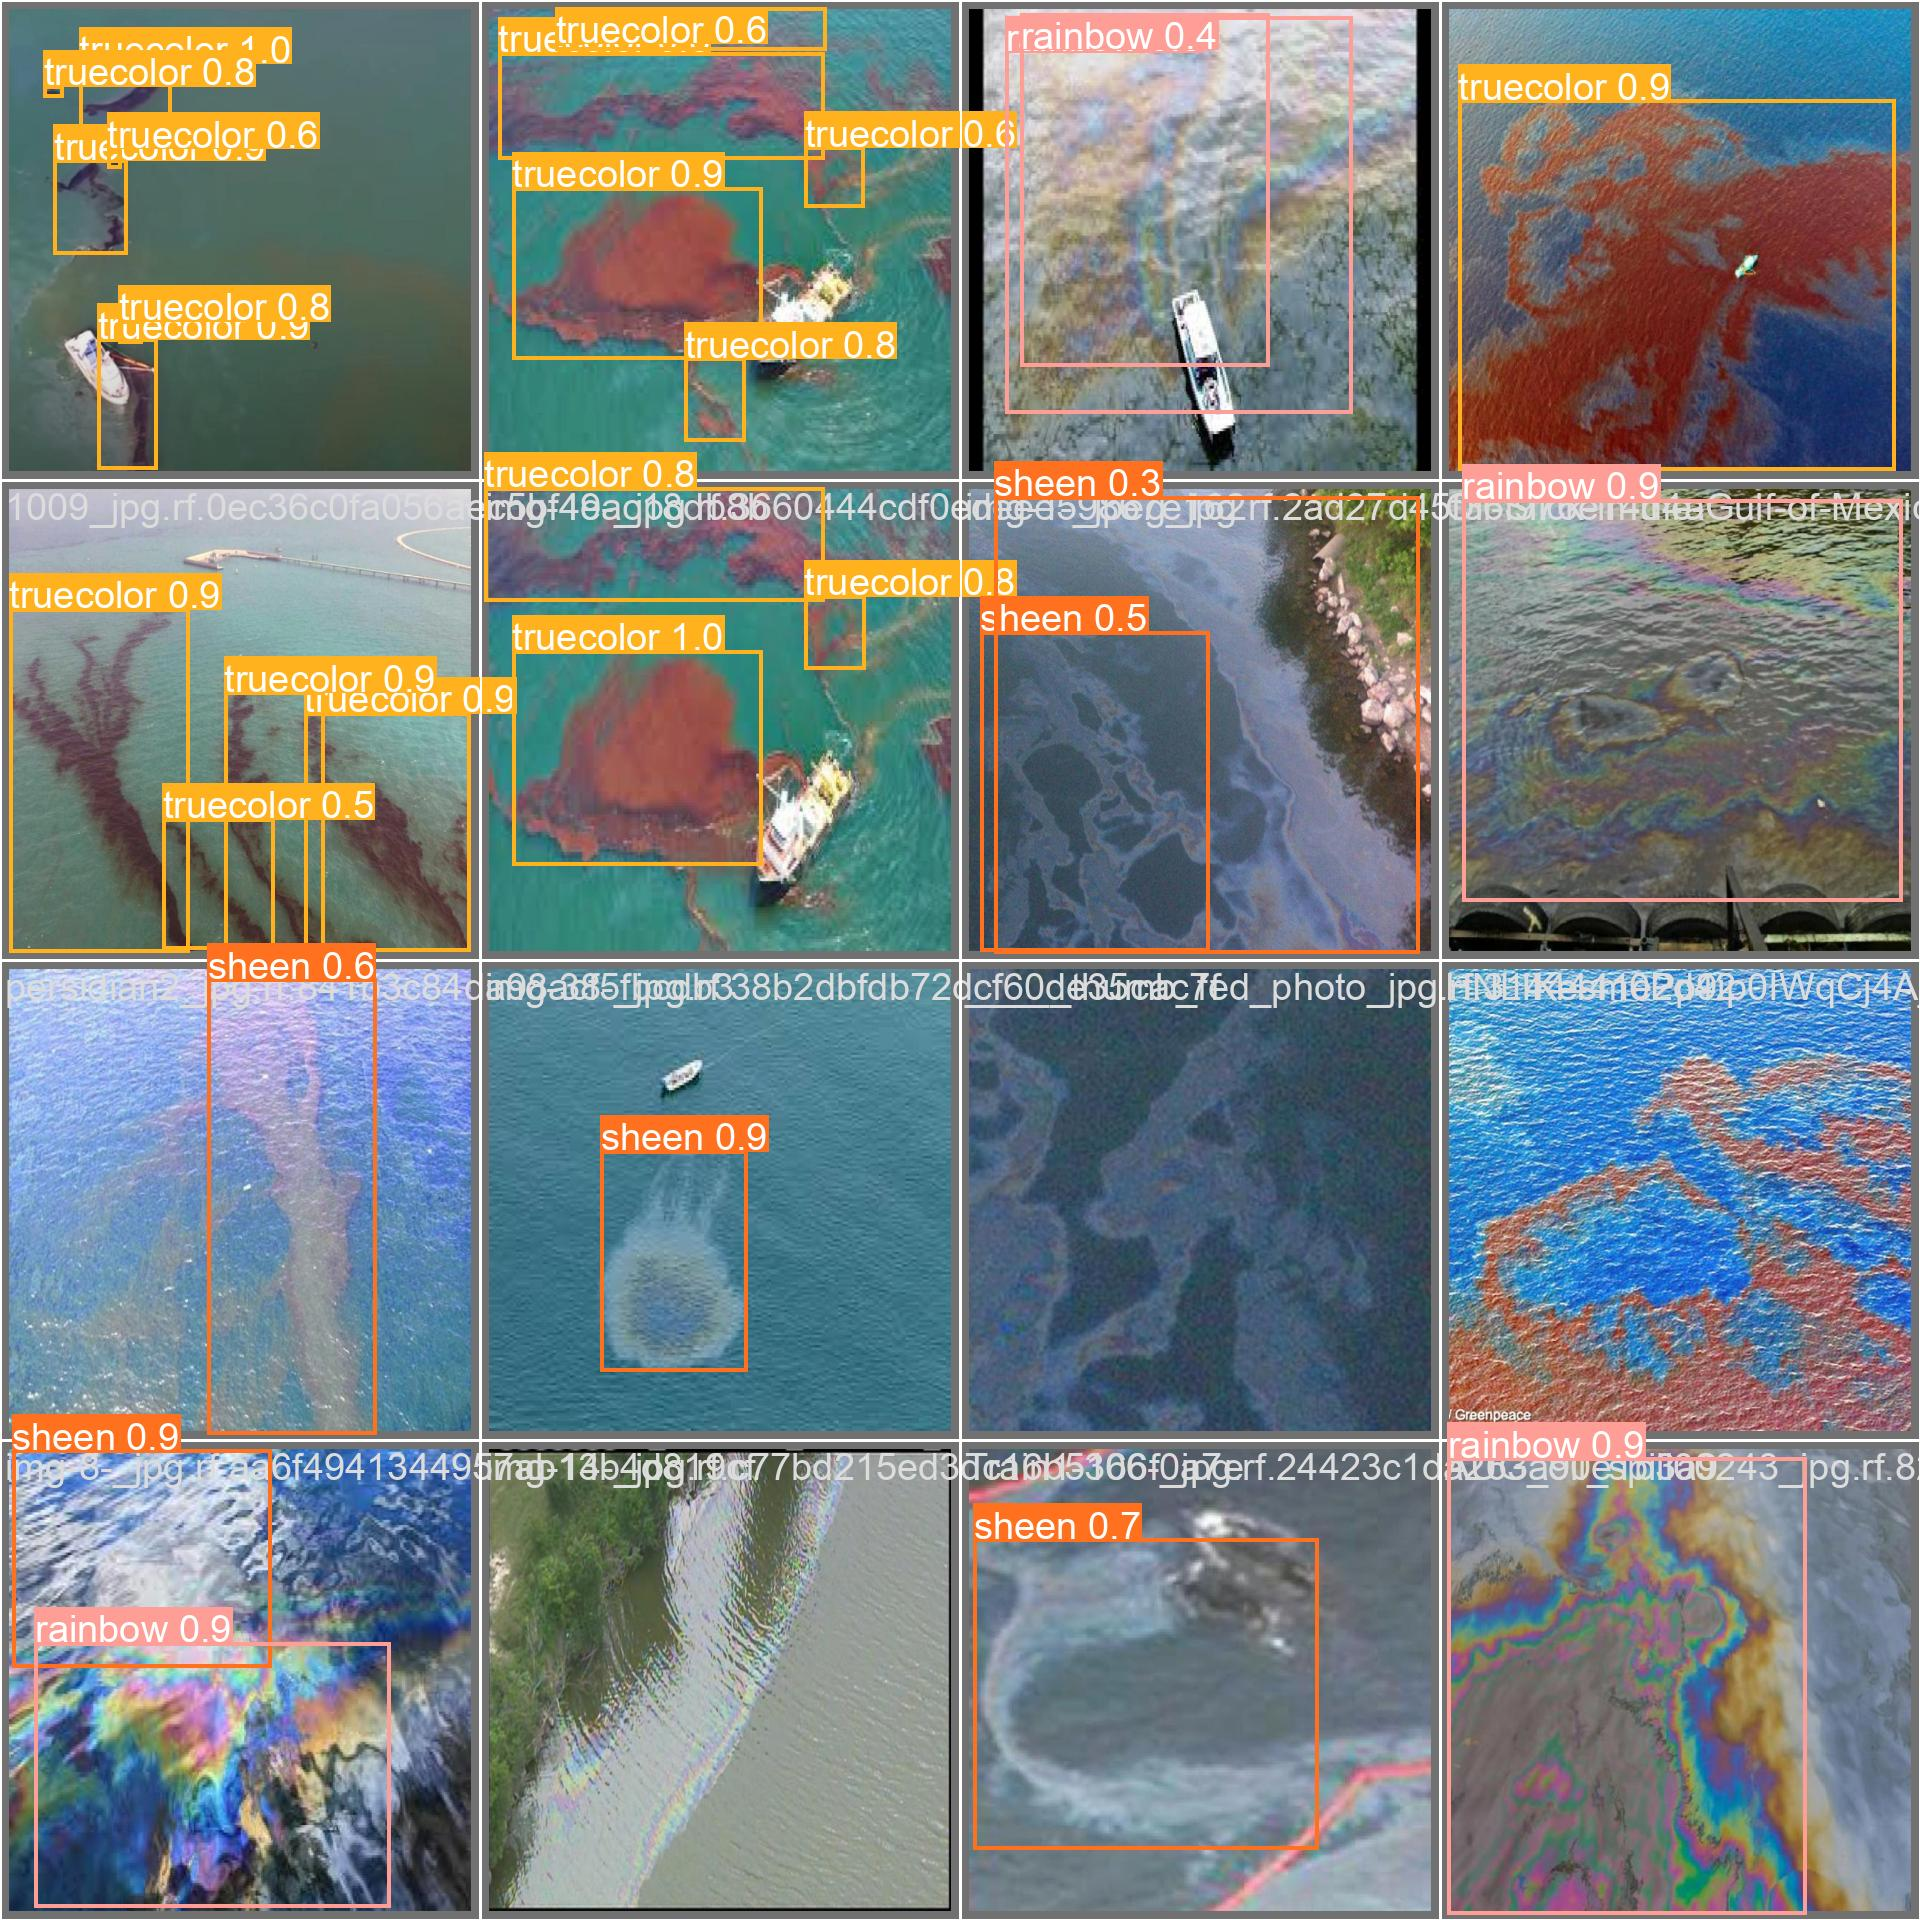

In [10]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [11]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
2023-10-18 04:23:19.075592: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-18 04:23:19.946698: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/Oil_Spill-1/valid/labels.cache... 24 images, 1 backgrounds, 0 corrupt: 100% 24/24 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 48, len(boxes) = 49. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment m

In [12]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
2023-10-18 04:23:54.875956: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-18 04:23:55.754490: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs
image 1/10 /content/datasets/Oil_Spill-1/test/images/1-1-_jpg.rf.f97b8220db2f5692bf77689f33d1c89a.jpg: 800x800 3 sheens, 24.6ms
image 2/10 /content/datasets/Oil_Spill-1/test/images/1004_jpg.rf.b7ee54ba4b1ab74d77be72c2fea6a71d.jpg: 800x800 6 truecolors, 24.7ms
image 3/10 /content/datasets/Oil_Spill-1/test/images/100507-G-0000A-003_jpg.rf.00ad80fced4788e2952a6329b70ca564.jpg: 800x800 24

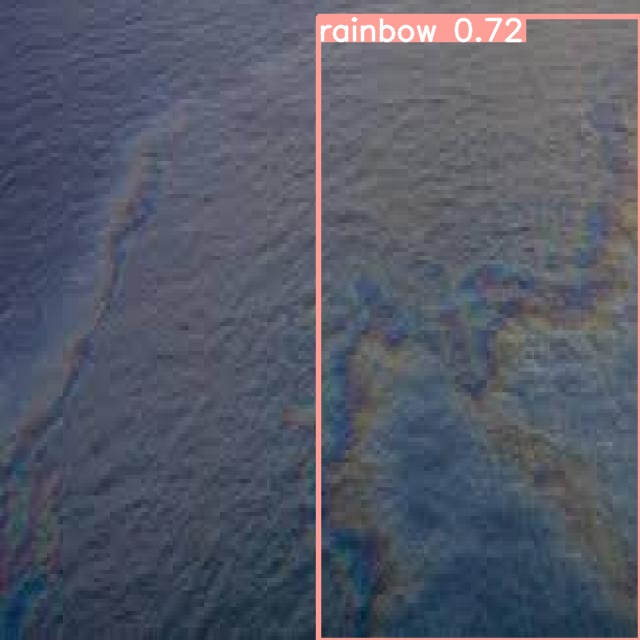

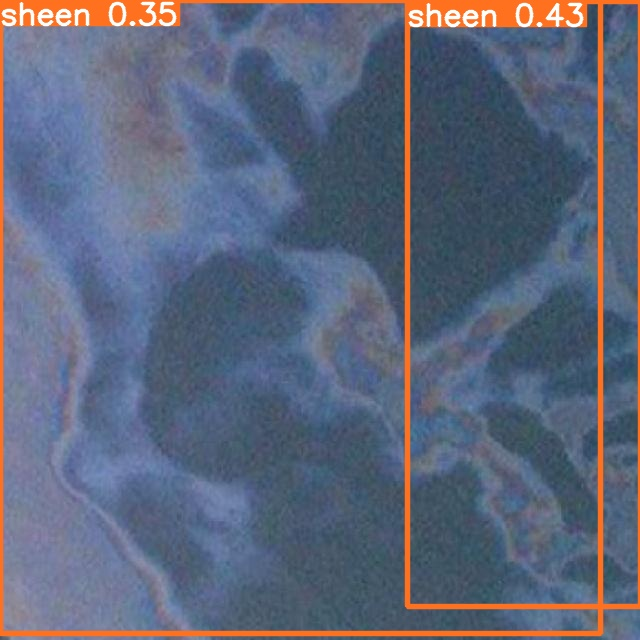

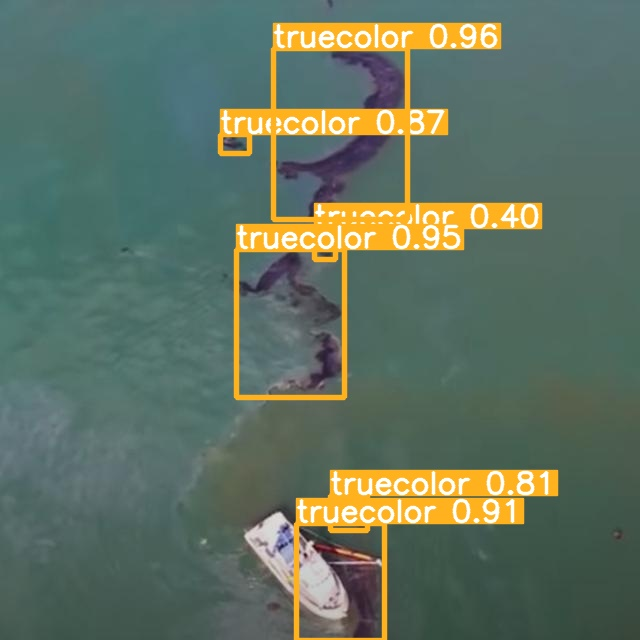

In [13]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [40]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images/1007_jpg.rf.3af0ddadcfd99a2b0e43f65b5f6e139e.jpg save=True

/content
2023-10-18 06:32:34.178421: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-18 06:32:35.056433: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs
image 1/1 /content/datasets/Oil_Spill-1/test/images/1007_jpg.rf.3af0ddadcfd99a2b0e43f65b5f6e139e.jpg: 800x800 6 truecolors, 24.7ms
Speed: 0.9ms pre-process, 24.7ms inference, 113.4ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs/detect/predict8


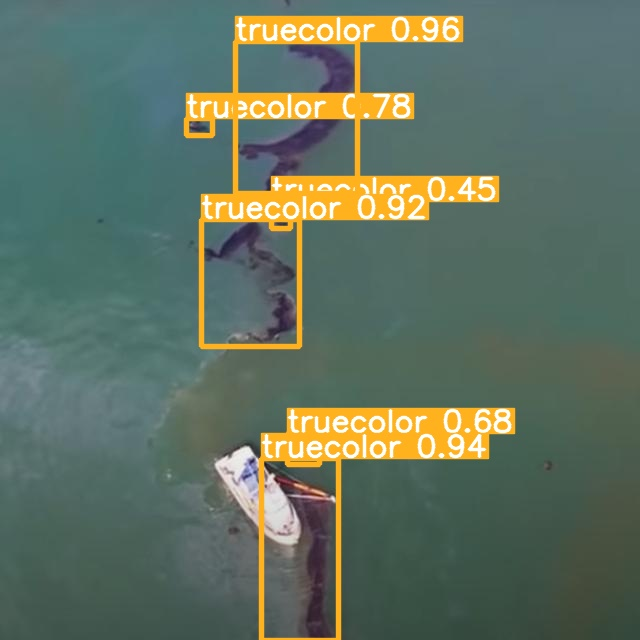

In [41]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict8/1007_jpg.rf.3af0ddadcfd99a2b0e43f65b5f6e139e.jpg'):
      display(Image(filename=image_path, width=600))
      print("\n")

In [15]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/DJI_0313.MP4 save=True

/content
2023-10-18 05:19:33.384158: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-18 05:19:34.249943: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs
video 1/1 (1/466) /content/DJI_0313.MP4: 480x800 63.5ms
video 1/1 (2/466) /content/DJI_0313.MP4: 480x800 15.4ms
video 1/1 (3/466) /content/DJI_0313.MP4: 480x800 15.5ms
video 1/1 (4/466) /content/DJI_0313.MP4: 480x800 15.4ms
video 1/1 (5/466) /content/DJI_0313.MP4: 480x800 15.4ms
video 1/1 (6/466) /content/DJI_0313.MP4: 480x800 15.4ms
video 1/1 (7/466) /content/DJI_0313.MP4: 480x800 15

In [21]:
from IPython.display import HTML

HTML("""
    <video alt="test" controls>
        <source src="/content/runs/detect/predict2/DJI_0313.mp4" type="video/mp4">
    </video>
""")